In [1]:
import glob
import pathlib
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np

rpi = 'h2r1'

path_to_folder = '../live_bees/' + rpi + '/random_images_25/*.jpg'
folder = sorted(glob.glob(path_to_folder))
names = [pathlib.Path(x).stem for x in folder]

path_to_mask = '../live_bees/' + rpi + '/masks/*.csv'
masks = sorted(glob.glob(path_to_mask))

dfs = []
for mask in masks:
    df = pd.read_csv(mask)
    dfs.append(df)

['../live_bees/h2r1/masks/hive2_rpi1_240419-194501Z_mask.csv', '../live_bees/h2r1/masks/hive2_rpi1_240419-211101Z_mask.csv', '../live_bees/h2r1/masks/hive2_rpi1_240420-023401Z_mask.csv', '../live_bees/h2r1/masks/hive2_rpi1_240420-223101Z_mask.csv', '../live_bees/h2r1/masks/hive2_rpi1_240421-144901Z_mask.csv', '../live_bees/h2r1/masks/hive2_rpi1_240421-202101Z_mask.csv', '../live_bees/h2r1/masks/hive2_rpi1_240422-052501Z_mask.csv', '../live_bees/h2r1/masks/hive2_rpi1_240422-102301Z_mask.csv', '../live_bees/h2r1/masks/hive2_rpi1_240423-011901Z_mask.csv', '../live_bees/h2r1/masks/hive2_rpi1_240423-034701Z_mask.csv', '../live_bees/h2r1/masks/hive2_rpi1_240423-160401Z_mask.csv', '../live_bees/h2r1/masks/hive2_rpi1_240423-190201Z_mask.csv', '../live_bees/h2r1/masks/hive2_rpi1_240423-201001Z_mask.csv', '../live_bees/h2r1/masks/hive2_rpi1_240424-155701Z_mask.csv', '../live_bees/h2r1/masks/hive2_rpi1_240425-172701Z_mask.csv', '../live_bees/h2r1/masks/hive2_rpi1_240426-024601Z_mask.csv', '../liv

In [30]:
points = []
x_max = 2592
y_max = 4608
imgs = []

for df, file in zip(dfs, folder):
    point = []
    img = cv2.imread(file)
    img = cv2.resize(img, (4608, 2592))
    for x, y in zip(df['axis-0'], df['axis-1']):
        if x < 0: x = 0
        elif x > x_max: x = x_max
        if y < 0: y = 0
        elif y > y_max: y = y_max
        point.append((int(y), int(x)))
        points.append(point)
        cv2.circle(img, (int(y), int(x)), 20, (0, 255, 0), -1)
    cv2.drawContours(img, [np.array(point)], -1, (255, 0, 0), 5)
    imgs.append(img)


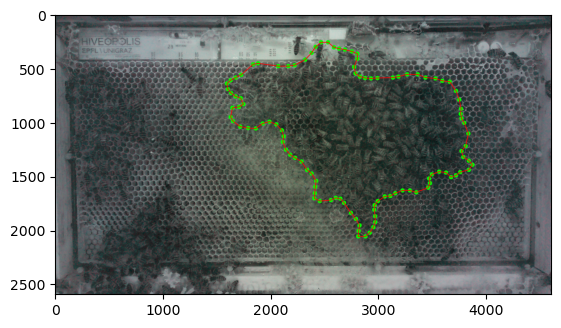

In [31]:
plt.imshow(imgs[2])